# **Objetivo General de la Práctica**
*Desarrollar habilidades para generar variables aleatorias a partir de
diferentes distribuciones mediante el método de la transformada
inversa. Esto permitirá comprender la aplicación del método en
problemas reales donde los tiempos, la demanda y la frecuencia de
eventos aleatorios influyen en el comportamiento de un sistema.*

# **Problema 2: Distribución Exponencial**
***Contexto:*** Una estación de carga rápida para vehículos eléctricos quiere
simular el tiempo entre la llegada de los vehículos para prever la cantidad
de puntos de carga necesarios durante el día. La llegada de los vehículos
sigue una distribución exponencial con una tasa de 1 llegada cada 15
minutos, en promedio.

***Objetivo:*** Generar tiempos entre llegadas de vehículos eléctricos durante
un día de operación (12 horas).

In [78]:
# Alumna: Romero Jiménez Sofía Cristal
# No. Control: 23041077

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [80]:
# Parámetros de la Distribución Binomial
tasa_llegada = 1 / 15  # 1 llegada cada 15 minutos en promedio
horas_operacion = 12
num_muestras = horas_operacion * 4  # 4 llegadas esperadas por hora en promedio

# Generación de datos (Distribución Exponencial)
def exponencial_inverse_transform(lambda_tasa, U):
    """Genera valores Exponenciales con la Transformada Inversa."""
    return -math.log(1 - U) / lambda_tasa

U_exponencial = np.random.uniform(0, 1, num_muestras)
tiempos_entre_llegadas = [exponencial_inverse_transform(tasa_llegada, u) for u in U_exponencial]

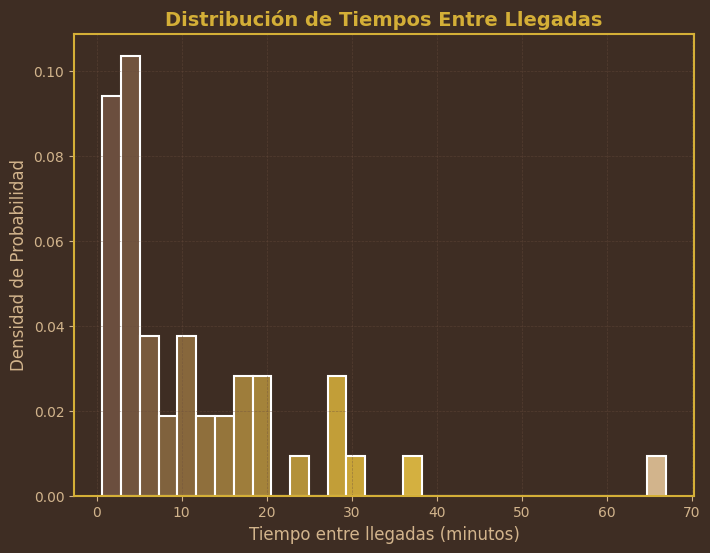

In [82]:
#Diseño de la gráfica
plt.figure(figsize=(8, 6))

dorado_mel = '#D4AF37'
marron_oscuro = '#3E2D23'
marron_claro = '#6B4E3E'
beige = '#D2B48C'
blanco = '#FFFFFF'

# Colormap personalizado
colors = [marron_claro, dorado_mel, beige]
cmap = LinearSegmentedColormap.from_list("custom_mel", colors, N=100)

# Histograma
n, bins, patches = plt.hist(tiempos_entre_llegadas, bins=30, edgecolor=blanco, linewidth=1.5, density=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col) if max(col) > 0 else 1
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

# Configuración de la gráfica
plt.title("Distribución de Tiempos Entre Llegadas", fontsize=14, color=dorado_mel, fontweight='bold')
plt.xlabel("Tiempo entre llegadas (minutos)", fontsize=12, color=beige)
plt.ylabel("Densidad de Probabilidad", fontsize=12, color=beige)
plt.tick_params(colors=beige)
plt.gca().set_facecolor(marron_oscuro)  # Fondo del área de la gráfica
plt.gcf().set_facecolor(marron_oscuro)  # Fondo de la figura
for spine in plt.gca().spines.values():
    spine.set_edgecolor(dorado_mel)
    spine.set_linewidth(1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color=marron_claro, alpha=0.5)

plt.show()